<a href="https://colab.research.google.com/github/Rafka-IP/My-Website/blob/main/Dicoding_Machine_Learning_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-05-01 07:21:50--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  1.68MB/s    in 5m 3s   

2021-05-01 07:26:54 (1.02 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import zipfile, os
local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()
 
fold_gunting = os.path.join('/content/rockpaperscissors/scissors')
fold_batu = os.path.join('/content/rockpaperscissors/rock')
fold_kertas = os.path.join('/content/rockpaperscissors/paper')

In [ ]:
os.listdir('/content/')

['.config',
 'rockpaperscissors.zip',
 'rockpaperscissors',
 '__MACOSX',
 'sample_data']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
BASIS_DIR = '/content/rockpaperscissors/rps-cv-images/'
 
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.4
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    BASIS_DIR,
    target_size = (150,150),
    class_mode = 'categorical',
    shuffle = True,
    subset = 'training'
    )
 
validation_generator = train_datagen.flow_from_directory(
    BASIS_DIR,
    target_size = (150,150),
    class_mode = 'categorical',
    shuffle = True,
    subset = 'validation'
    )

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
 
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
 
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy'])

In [ ]:
 class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.98):
      print("\nPELATIHAN BERHENTI, AKURASI MODEL SUDAH LEBIH DARI 80%!")
      self.model.stop_training = True

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 4,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 4,
    verbose = 2,
    callbacks = [myCallback()]
)

Epoch 1/100
4/4 - 6s - loss: 0.7768 - accuracy: 0.8672 - val_loss: 0.8663 - val_accuracy: 0.8281
Epoch 2/100
4/4 - 5s - loss: 0.6333 - accuracy: 0.8125 - val_loss: 0.4605 - val_accuracy: 0.8750
Epoch 3/100
4/4 - 5s - loss: 0.4223 - accuracy: 0.8906 - val_loss: 0.4100 - val_accuracy: 0.8281
Epoch 4/100
4/4 - 5s - loss: 0.3501 - accuracy: 0.8594 - val_loss: 0.4385 - val_accuracy: 0.8359
Epoch 5/100
4/4 - 5s - loss: 0.4943 - accuracy: 0.7734 - val_loss: 0.5798 - val_accuracy: 0.8516
Epoch 6/100
4/4 - 5s - loss: 0.4696 - accuracy: 0.8516 - val_loss: 0.3129 - val_accuracy: 0.9062
Epoch 7/100
4/4 - 5s - loss: 0.3668 - accuracy: 0.8516 - val_loss: 0.3866 - val_accuracy: 0.8750
Epoch 8/100
4/4 - 5s - loss: 0.4601 - accuracy: 0.8438 - val_loss: 0.3909 - val_accuracy: 0.8438
Epoch 9/100
4/4 - 4s - loss: 0.2754 - accuracy: 0.9286 - val_loss: 0.4061 - val_accuracy: 0.8828
Epoch 10/100
4/4 - 5s - loss: 0.3448 - accuracy: 0.8906 - val_loss: 0.2842 - val_accuracy: 0.9219
Epoch 11/100
4/4 - 5s - loss:

In [ ]:
import pandas as pd
 
df = pd.DataFrame({'accuracy' : history.history['accuracy'],
                   'loss_accuracy': history.history['loss'],
                   'val_accuracy' : history.history['val_accuracy'],
                   'val_loss' : history.history['val_loss']
                   })
 
df.head()

,accuracy,loss_accuracy,val_accuracy,val_loss
0,0.867188,0.776836,0.828125,0.866259
1,0.812500,0.633281,0.875000,0.460484
2,0.890625,0.422290,0.828125,0.409995
3,0.859375,0.350065,0.835938,0.438516
4,0.773438,0.494282,0.851562,0.579819


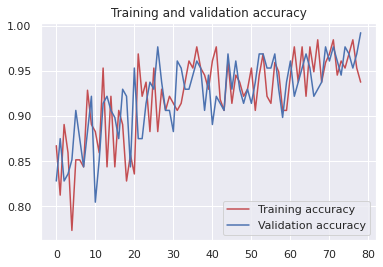

<Figure size 432x288 with 0 Axes>

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [50]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
 
%matplotlib inline

In [61]:
file = files.upload()

Saving 0CSaM2vL2cWX6Cay.png to 0CSaM2vL2cWX6Cay (1).png


0CSaM2vL2cWX6Cay.png
[[0. 0. 1.]]
Prediksi Machine Learning: Gunting


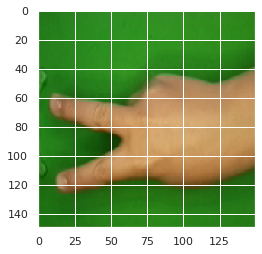

In [62]:
for i in file.keys():
  path = i
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
 
  print(i)
  print(classes)
  if classes[0][0] == 1:
    print('Prediksi Machine Learning: Kertas')
  elif classes[0][1] == 1:
    print('Prediksi Machine Learning: Batu')
  elif classes[0][2] == 1:
    print('Prediksi Machine Learning: Gunting')
  else:
    print('Gambar salah')